In [1]:
import os
import pandas as pd
import seaborn as sns
files = os.listdir("../data")

In [2]:
files

['annual average expenditure 55-64.csv',
 'average expenditure 25-34.csv',
 'average expenditure 35-44.csv',
 'construction_workers_wages_index.csv',
 'consumer_price_index.csv',
 'employees_construction.csv',
 'GDP.csv',
 'HCAI_GOVT.csv',
 'HCAI_GOVT.xls',
 'HCAI_GSE.csv',
 'HCAI_GSE.xls',
 'HCAI_PP.csv',
 'HCAI_PP.xls',
 'homeownershiprate.csv',
 'houses_for_sale_to_houses_sold.csv',
 'Industrial_production_cement.csv',
 'job gains private.csv',
 'MORTGAGE30US.csv',
 'new_privately_owned_housing_under_construction.csv',
 'nonresidentialsa-valueOfConstriction-Monthly.csv',
 'nonresidentialsa-valueOfConstriction-Monthly.xls',
 'non_residential_private_construction_spending.csv',
 'Permits_Granted_Monthly.csv',
 'personal saving rate.csv',
 'Population_Quarterly.csv',
 'poverty_rate.csv',
 'privately_owned_housing_units_completed.csv',
 'producer_price_index_concrete_brick.csv',
 'renter_occupied_housing_rate.csv',
 'residentialsa-ValueOfConstruction.csv',
 'residentialsa-ValueOfConstru

In [3]:
## For interpolating annual data to monthly data
monthly_rng = pd.date_range("01-2001","1-2021", freq = "M")
monthly_rng

DatetimeIndex(['2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31',
               ...
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', length=240, freq='M')

In [4]:
qtr_rng = pd.date_range("01-2001","1-2021", freq = "Q")
qtr_rng

DatetimeIndex(['2001-03-31', '2001-06-30', '2001-09-30', '2001-12-31',
               '2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31',
               '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31',
               '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
               '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
      

In [5]:
# Converting annual data to monthly data

def annual_monthly(annual_values,index_for_new_df,digits = 2):
    monthly_values = []
    
    for i in range(1,len(annual_values)):
        annual_change = annual_values[i] - annual_values[i-1];
        
        monthly_change = round(annual_change/12,digits)
        prev_value = annual_values[i-1]
        for j in range(12):
            monthly_values.append(prev_value+monthly_change)
            prev_value = prev_value + monthly_change
            

        
    return pd.DataFrame(monthly_values,index=index_for_new_df)


# def quaterly_monthly(quaterly_values,index_for_new_df,digits = 2):
#     monthly_values = []
    
    
#     for i in range(0,77,4):
#         tlist = quaterly_values[i:i+4]
        
        
        
#         for j in range(1,4):
#             quaterly_change = tlist[j] - tlist[j-1]
        
#             monthly_change = round(quaterly_change/3,digits)
        
#             tchange = [tlist[j-1] + monthly_change*k for k in range(4) ]
            
#             monthly_values.extend(tchange)
            
        
        
#     return pd.DataFrame(monthly_values,index=index_for_new_df)

def quaterly_monthly(quaterly_values,index_for_new_df,digits = 2):
    monthly_values = []
    
    
    for i in range(1,len(quaterly_values)):
        
        
        
        quaterly_change = quaterly_values[i] - quaterly_values[i-1]

        monthly_change = round(quaterly_change/3,digits)

        tchange = [quaterly_values[i-1] + monthly_change*k for k in range(3) ]
        
        monthly_values.extend(tchange)
            
        
        
    return pd.DataFrame(monthly_values,index=index_for_new_df)


#### annual average expenditure 55-64.csv

In [12]:
tdf = pd.read_csv("../data/annual average expenditure 55-64.csv")
tdf = tdf[["Year","Value"]]

tdf.Year = tdf.Year.astype("str")
tdf.Year = pd.to_datetime(tdf.Year,format="%Y")


tdf = annual_monthly(tdf["Value"],monthly_rng,0)

tdf.rename(columns = {0:"avg_expenditure_55_64"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")


tdf.to_csv("../data_cleaned/avg-expenditure-55-64.csv",index=True)

## average expenditure 25-34

In [15]:
tdf = pd.read_csv("../data/average expenditure 25-34.csv")
tdf = tdf[["Year","Value"]]

tdf.Year = tdf.Year.astype("str")
tdf.Year = pd.to_datetime(tdf.Year,format="%Y")


tdf = annual_monthly(tdf["Value"],monthly_rng,0)

tdf.rename(columns = {0:"avg_expenditure_25_34"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")

tdf.to_csv("../data_cleaned/average expenditure 25-34.csv",index=True)

## average_annual_expenditure_45-54

In [23]:
tdf = pd.read_csv("../data/average_annual_expenditure_45-54.csv")

tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,drop=True,inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf = tdf["2000-01":"2020-12"]


tdf = annual_monthly(tdf["CXUTOTALEXPLB0405M"],monthly_rng,0)

tdf.rename(columns = {0:"avg_expenditure_45_54"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")
tdf

tdf.to_csv("../data_cleaned/average_annual_expenditure_45-54.csv",index=True)

## average expenditure 45-54

## consumer_price_index.csv

In [132]:
tdf = pd.read_csv("../data/consumer_price_index.csv")

tdf.DATE = pd.to_datetime(tdf.DATE,format="%d-%m-%Y")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,drop=True,inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf = tdf["2001-01":"2020-12"]
tdf.to_csv("../data_cleaned/consumer_price_index.csv")

## employees_construction.csv

In [11]:

tdf = pd.read_csv("../data/employees_construction.csv")
tdf
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,drop=True,inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf = tdf["2001-01":"2020-12"]
tdf.rename(columns={"USCONS":"employees_construction"},inplace=True)
tdf.to_csv("../data_cleaned/employees_construction.csv")

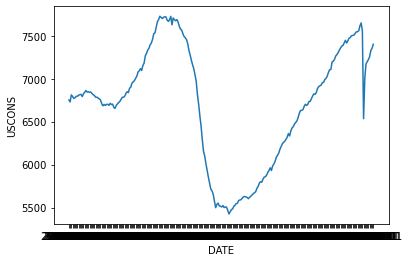

In [136]:
sns.lineplot(data=tdf, x="DATE", y="USCONS")

## GDP.csv

In [406]:

tdf = pd.read_csv("../data/GDP.csv")

tdf.DATE = pd.to_datetime(tdf.DATE,format="%d-%m-%Y")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,drop=True,inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf = tdf["2001-01":"2021-01"]
tdf = quaterly_monthly(tdf.GDP,monthly_rng)


tdf.rename(columns = {0:"GDP"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")
tdf
tdf.to_csv("../data_cleaned/GDP.csv")

In [404]:
tdf

,GDP
DATE,
2001-01,10470.231
2001-04,10599.000
2001-07,10598.020
2001-10,10660.465
2002-01,10783.500
...,...
2019-10,21694.458
2020-01,21481.367
2020-04,19477.444


## HCAI_GOVT.xls

In [421]:

tdf = pd.read_csv("../data/HCAI_GOVT.csv")
quarters = {1:1,2:4,3:7,4:10}

tdf.Quarter= tdf.Quarter.map(quarters)
tdf.Year = tdf.Year.astype("str") + "-" + tdf.Quarter.astype("str")

tdf["DATE"] = pd.to_datetime(tdf.Year,format="%Y-%m")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,drop=True,inplace=True)
tdf.drop(columns={"Year","DATE","Quarter","Borrower\nRisk","Product\nRisk"},inplace=True)
tdf = tdf["2001-01":"2021-04"]
tdf = quaterly_monthly(tdf["Total\nRisk"],monthly_rng)


tdf.rename(columns = {0:"HCAI_GOVT"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")
tdf
tdf.to_csv("../data_cleaned/HCAI_GOVT.csv")

## HCAI GSE


In [424]:

tdf = pd.read_csv("../data/HCAI_GSE.csv")
quarters = {1:1,2:4,3:7,4:10}

tdf.Quarter= tdf.Quarter.map(quarters)
tdf.Year = tdf.Year.astype("str") + "-" + tdf.Quarter.astype("str")

tdf["DATE"] = pd.to_datetime(tdf.Year,format="%Y-%m")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,drop=True,inplace=True)
tdf.drop(columns={"Year","DATE","Quarter","Borrower\nRisk","Product\nRisk"},inplace=True)
tdf = tdf["2001-01":"2021-4"]
tdf = quaterly_monthly(tdf["Total\nRisk"],monthly_rng)


tdf.rename(columns = {0:"HCAI_GSE"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")
tdf
tdf.to_csv("../data_cleaned/HCAI_GSE.csv")

## HCAI_PP

In [427]:

tdf = pd.read_csv("../data/HCAI_PP.csv")
quarters = {1:1,2:4,3:7,4:10}

tdf.Quarter= tdf.Quarter.map(quarters)
tdf.Year = tdf.Year.astype("str") + "-" + tdf.Quarter.astype("str")

tdf["DATE"] = pd.to_datetime(tdf.Year,format="%Y-%m")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,drop=True,inplace=True)
tdf.drop(columns={"Year","DATE","Quarter","Borrower\nRisk","Product\nRisk"},inplace=True)
tdf = tdf["2001-01":"2021-4"]
tdf = quaterly_monthly(tdf["Total\nRisk"],monthly_rng)


tdf.rename(columns = {0:"HCAI_PP"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")
tdf
tdf.to_csv("../data_cleaned/HCAI_PP.csv")

## homeownershiprate


In [303]:

tdf = pd.read_csv("../data/homeownershiprate.csv")

tdf = tdf.iloc[::-1].reset_index(drop=True)


quaters = tdf[["First","Second","Third","Fourth"]]

quaterly_values = []
for i in range(21):
    quaterly_values.extend(quaters.T[i])
    
tdf = quaterly_monthly(quaterly_values,monthly_rng)
tdf.rename(columns = {0:"home-ownership-rate"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")
tdf
tdf.to_csv("../data_cleaned/home-ownership-rate.csv")

## houses_for_sale_to_houses_sold

In [6]:
tdf = pd.read_csv("../data/houses_for_sale_to_houses_sold.csv")
tdf["DATE"] = pd.to_datetime(tdf.DATE,format="%Y-%m")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,drop=True,inplace=True)
tdf.drop(columns={"DATE"},inplace=True)

tdf = tdf["2001-01":"2020-12"]
tdf.rename(columns={"MSACSR":"houses-for-sale-to-sold"},inplace=True)

tdf.to_csv("../data_cleaned/houses_for_sale_to_houses_sold.csv")

## job gains private.csv

In [10]:
tdf = pd.read_csv("../data/job gains private.csv")

def quaterly_monthly_changed(quaterly_values,index_for_new_df,digits = 2):
    monthly_values = []
    
    
    for i in range(0,77,4):
        tlist = list(quaterly_values[i:i+4])
        
#         print(tlist)
        
        for j in range(0,4):
            quaterly_change = tlist[j]
        
            monthly_change = round(quaterly_change/3,digits)
        
            tchange = [monthly_change]*3
#             print(tchange)
            monthly_values.extend(tchange)
    
            
        
    return pd.DataFrame(monthly_values,index=index_for_new_df)
    
    
tdf = quaterly_monthly_changed(tdf["Value"],monthly_rng)
tdf.rename(columns={"0":"job_gains_private"},inplace=True)
tdf
tdf.to_csv("../data_cleaned/job_gains_private.csv")

## MORTGAGE30US.csv

In [341]:
tdf = pd.read_csv("../data/MORTGAGE30US.csv")

tdf.DATE = pd.to_datetime(tdf.DATE,format="%d-%m-%Y")
tdf.set_index("DATE",inplace=True)
tdf = tdf.resample("M").mean()
tdf.index = tdf.index.strftime("%Y-%m")
tdf = tdf["2001-01":"2020-12"]
tdf
tdf.to_csv("../data_cleaned/MORTGAGE30US.csv")

,MORTGAGE30US
DATE,
2001-01,7.0325
2001-02,7.0500
2001-03,6.9520
2001-04,7.0775
2001-05,7.1450
...,...
2020-08,2.9350
2020-09,2.8900
2020-10,2.8340


## new_privately_owned_housing_under_construction

In [7]:
tdf = pd.read_csv("../data/new_privately_owned_housing_under_construction.csv")

tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.set_index("DATE",inplace=True)

tdf.index = tdf.index.strftime("%Y-%m")
tdf = tdf["2001-01":"2020-12"]
tdf.rename(columns={"UNDCONTSA":"pvt_owned_house_under_const"},inplace=True)
tdf.to_csv("../data_cleaned/new_privately_owned_housing_under_construction.csv")
tdf

,pvt_owned_house_under_const
DATE,
2001-01,986.0
2001-02,987.0
2001-03,1001.0
2001-04,1007.0
2001-05,1015.0
...,...
2020-08,1212.0
2020-09,1218.0
2020-10,1228.0


## residentialsa-ValueOfConstruction.xls

In [464]:
tdf = pd.read_csv("../data/residentialsa-ValueOfConstruction.csv")
tdf = tdf.drop([0,21,22],axis=0).reset_index(drop=True)
monthly_data = tdf.loc[:,tdf.columns!="Year"]

monthly_values = []
for i in range(20):
    monthly_values.extend(monthly_data.T[i])

tdf = pd.DataFrame(monthly_values,index=monthly_rng)
tdf[0] = tdf[0].str.replace(",","").astype("int")
tdf.rename(columns={0:"residential_const_val"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")
tdf.to_csv("../data_cleaned/residential_construction_val.csv")
tdf

,residential_const_val
2001-01,348279
2001-02,353629
2001-03,350029
2001-04,361991
2001-05,360534
...,...
2020-08,632725
2020-09,648272
2020-10,664062
2020-11,684497


## nonresidential-valueOfConstruction-Monthly

In [463]:
tdf = pd.read_csv("../data/nonresidentialsa-valueOfConstriction-Monthly.csv")
tdf = tdf.drop([0],axis=0).reset_index(drop=True)
monthly_data = tdf.loc[:,tdf.columns!="Year"]

monthly_values = []
for i in range(20):
    monthly_values.extend(monthly_data.T[i])

tdf = pd.DataFrame(monthly_values,index=monthly_rng)
tdf[0] = tdf[0].str.replace(",","").astype("int")
tdf.rename(columns={0:"nonresidential_const_val"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")

tdf.to_csv("../data_cleaned/nonresidential_const_val.csv")



## Permits_Granted_Monthly.csv

In [377]:
tdf = pd.read_csv("../data/Permits_Granted_Monthly.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%d-%m-%Y")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf.rename(columns={"PERMIT(th)":"permits"},inplace=True)
tdf = tdf["2001-01":"2020-12"]

tdf.to_csv("../data_cleaned/Permits_Granted_Monthly.csv")
tdf

,permits
DATE,
2001-01,1699
2001-02,1656
2001-03,1659
2001-04,1666
2001-05,1665
...,...
2020-08,1522
2020-09,1589
2020-10,1595


## personal saving rate.csv


In [381]:
tdf = pd.read_csv("../data/personal saving rate.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%d-%m-%Y")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf.rename(columns={"PSAVERT":"personal_saving_rate"},inplace=True)
tdf = tdf["2001-01":"2020-12"]

tdf.to_csv("../data_cleaned/personal saving rate.csv")
tdf

,personal_saving_rate
DATE,
2001-01,4.9
2001-02,5.0
2001-03,5.3
2001-04,5.1
2001-05,4.5
...,...
2020-08,15.0
2020-09,14.3
2020-10,13.6


## Population_Quarterly.csv

In [428]:
tdf = pd.read_csv("../data/Population_Quarterly.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%d-%m-%Y")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2001-01":"2021-01"]
    
tdf = quaterly_monthly(tdf["B230RC0Q173SBEA"],monthly_rng)
tdf.rename(columns = {0:"population"},inplace=True)
tdf.index = tdf.index.strftime("%Y-%m")
# tdf
tdf.to_csv("../data_cleaned/Population.csv")
tdf

,population
2001-01,284169.00
2001-02,284392.00
2001-03,284615.00
2001-04,284838.00
2001-05,285086.67
...,...
2020-08,330517.00
2020-09,330666.00
2020-10,330815.00
2020-11,330880.33


In [399]:
tdf

,DATE,B230RC0Q173SBEA
DATE,,
2000-01,2000-01,281304
2000-04,2000-04,282002
2000-07,2000-07,282769
2000-10,2000-10,283518
2001-01,2001-01,284169
...,...,...
2020-04,2020-04,329898
2020-07,2020-07,330368
2020-10,2020-10,330815


## privately_owned_housing_units_completed.csv

In [434]:
tdf = pd.read_csv("../data/privately_owned_housing_units_completed.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2001-01":"2020-12"]
    
# tdf = quaterly_monthly(tdf["B230RC0Q173SBEA"],monthly_rng)
tdf.rename(columns = {"COMPUTSA":"house_units_completed"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
# tdf.index = tdf.index.strftime("%Y-%m")
# # tdf
tdf.to_csv("../data_cleaned/privately_owned_housing_units_completed.csv")
tdf

,house_units_completed
DATE,
2001-01,1456.0
2001-02,1536.0
2001-03,1470.0
2001-04,1574.0
2001-05,1497.0
...,...
2020-08,1216.0
2020-09,1426.0
2020-10,1356.0


## retail_sales_home_furnishing_stores.csv

In [437]:
tdf = pd.read_csv("../data/retail_sales_home_furnishing_stores.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2001-01":"2020-12"]

tdf.rename(columns = {"MRTSSM442USS":"retail_sales_home_furnishing_stores"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
# # tdf.index = tdf.index.strftime("%Y-%m")
# # # tdf
tdf.to_csv("../data_cleaned/retail_sales_home_furnishing_stores.csv")
tdf

,retail_sales_home_furnishing_stores
DATE,
2001-01,7764
2001-02,7611
2001-03,7549
2001-04,7560
2001-05,7559
...,...
2020-08,10812
2020-09,10843
2020-10,10864


## Unemployment rate.csv

In [440]:
tdf = pd.read_csv("../data/Unemployment rate.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2001-01":"2020-12"]

tdf.rename(columns = {"MRTSSM442USS":"unrate"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
# # tdf.index = tdf.index.strftime("%Y-%m")
# # # tdf
tdf.to_csv("../data_cleaned/Unemployment rate.csv")
tdf

,UNRATE
DATE,
2001-01,4.2
2001-02,4.2
2001-03,4.3
2001-04,4.4
2001-05,4.3
...,...
2020-08,8.4
2020-09,7.8
2020-10,6.9


## unemployment_rate_construction.csv

In [445]:
tdf = pd.read_csv("../data/unemployment_rate_construction.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2001-01":"2020-12"]

tdf.rename(columns = {"LNU04032231":"unrate_construction"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
# # tdf.index = tdf.index.strftime("%Y-%m")
# # # tdf
tdf.to_csv("../data_cleaned/unrate_construction.csv")
tdf


,unrate_construction
DATE,
2001-01,9.8
2001-02,9.9
2001-03,8.4
2001-04,7.1
2001-05,5.6
...,...
2020-08,7.6
2020-09,7.1
2020-10,6.8


##  Industrial_production_cement

In [451]:
tdf = pd.read_csv("../data/Industrial_production_cement.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2001-01":"2020-12"]

tdf.rename(columns = {"IPN32731S":"industrial_production_cement"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
# # tdf.index = tdf.index.strftime("%Y-%m")
# # # tdf
tdf.to_csv("../data_cleaned/industrial_production_cement.csv")
tdf


,industrial_production_cement
DATE,
2001-01,139.6212
2001-02,144.0119
2001-03,147.6176
2001-04,152.7136
2001-05,149.7220
...,...
2020-08,100.7609
2020-09,100.6016
2020-10,102.4985


## producer_price_index_concrete_brick.csv

In [454]:
tdf = pd.read_csv("../data/producer_price_index_concrete_brick.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2001-01":"2020-12"]

tdf.rename(columns = {"PCU32733132733106":"producer_price_index_concrete_brick"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
# # tdf.index = tdf.index.strftime("%Y-%m")
# # # tdf
tdf.to_csv("../data_cleaned/producer_price_index_concrete_brick.csv")
tdf


,producer_price_index_concrete_brick
DATE,
2001-01,144.2
2001-02,144.2
2001-03,144.2
2001-04,148.0
2001-05,149.3
...,...
2020-08,261.4
2020-09,263.3
2020-10,263.3


## Target


In [457]:
tdf = pd.read_csv("../data/target.csv")
tdf.DATE = pd.to_datetime(tdf.DATE,format="%Y-%m-%d")
tdf.DATE = tdf.DATE.dt.strftime('%Y-%m')
tdf.set_index(tdf.DATE,inplace=True)

tdf = tdf["2001-01":"2020-12"]

tdf.rename(columns = {"CSUSHPISA":"target"},inplace=True)
tdf.drop(columns={"DATE"},inplace=True)
tdf.to_csv("../data_cleaned/target.csv")